In [1]:
import pandas as pd

df = pd.read_csv("./datasets/resampled_data_smote2.csv")
df.head


<bound method NDFrame.head of           cDNA  Amino acid (HGVS)  Amino acid (Legacy)       pos  Type  \
0    -1.411869          -1.412448            -1.412429  2.224128     0   
1    -1.499705          -1.499467            -1.500672 -0.958553     0   
2    -1.499705          -1.499467            -1.500672 -0.958553     0   
3    -1.499705          -1.499467            -1.500672 -0.958553     0   
4    -1.499705          -1.499467            -1.500672 -0.958553     0   
...        ...                ...                  ...       ...   ...   
8491  1.122053           1.121906             1.121902  0.632787     0   
8492 -1.355363          -1.355617            -1.356571  0.961568     0   
8493 -1.078096          -1.077854            -1.077838 -0.958553     0   
8494  1.297437           1.297291             1.297285  0.632787     0   
8495  1.365764           1.366028             1.366022 -0.958553     0   

      Domain  Effect  Sequence Context  Original AA  New AA  AminoBefore  \
0    

In [2]:
## without k fold

       cDNA  Amino acid (HGVS)  Amino acid (Legacy)       pos  Type  Domain  \
0 -1.411869          -1.412448            -1.412429  2.224128     0       0   
1 -1.499705          -1.499467            -1.500672 -0.958553     0       6   
2 -1.499705          -1.499467            -1.500672 -0.958553     0       6   
3 -1.499705          -1.499467            -1.500672 -0.958553     0       6   
4 -1.499705          -1.499467            -1.500672 -0.958553     0       6   

   Effect  Sequence Context  Original AA  New AA  AminoBefore  AminoAfter  \
0       0               186            6       3            3           3   
1       0                90           12      20           10          18   
2       0                90           12      20           10          18   
3       0                90           12      20           10          18   
4       0                90           12      20           10          18   

   Locationingene  nitroBaseBef  nitroBaseAft  Severity  
0   

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4046 - loss: 1.1060 - val_accuracy: 0.5382 - val_loss: 0.9601
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5418 - loss: 0.9358 - val_accuracy: 0.5441 - val_loss: 0.9258
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5505 - loss: 0.9283 - val_accuracy: 0.5603 - val_loss: 0.9066
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5688 - loss: 0.8976 - val_accuracy: 0.5588 - val_loss: 0.8937
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5703 - loss: 0.8914 - val_accuracy: 0.5941 - val_loss: 0.8769
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5851 - loss: 0.8778 - val_accuracy: 0.5926 - val_loss: 0.8717
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5902 - loss: 0.8676 - val_accuracy: 0.5853 - val_loss: 0.8676
Epoch 8/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5796 - loss: 0.8610 - val_accuracy: 0.5912 - val_

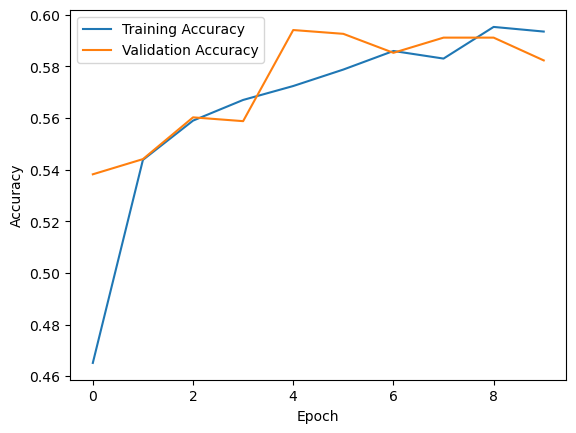

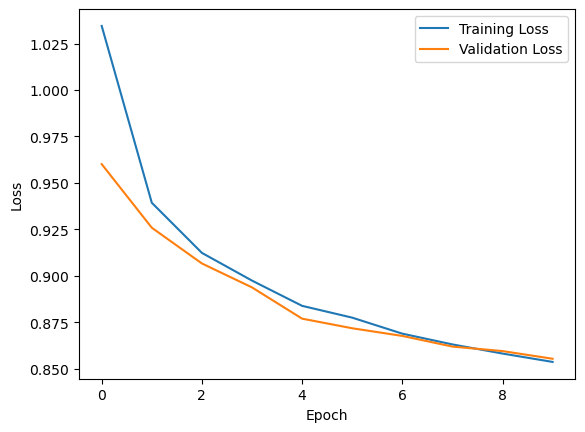

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("./datasets/resampled_data_smote2.csv")

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Extract features and target
X = df.drop('Severity', axis=1)
y = df['Severity']

# Check if Severity needs to be encoded
if y.nunique() > 2:
    y = pd.get_dummies(y)  # One-hot encoding for multiclass classification

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X to 3D array for RNN: (samples, timesteps, features)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
if y.shape[1] == 1:
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    loss_function = 'binary_crossentropy'
else:
    model.add(Dense(y.shape[1], activation='softmax'))  # Multiclass classification
    loss_function = 'categorical_crossentropy'

model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [5]:
## with k fold

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, log_loss
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("./datasets/resampled_data_smote2.csv")

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Extract features and target
X = df.drop('Severity', axis=1)
y = df['Severity']

# Check if Severity needs to be encoded
if y.nunique() > 2:
    y = pd.get_dummies(y)  # One-hot encoding for multiclass classification

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X to 3D array for RNN: (samples, timesteps, features)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Define the K-Fold cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Function to build and compile the RNN model
def create_model(input_shape, num_classes):
    model = Sequential()
    model.add(SimpleRNN(units=50, activation='relu', input_shape=input_shape))
    if num_classes == 1:
        model.add(Dense(1, activation='sigmoid'))  # Binary classification
        loss_function = 'binary_crossentropy'
    else:
        model.add(Dense(num_classes, activation='softmax'))  # Multiclass classification
        loss_function = 'categorical_crossentropy'
    
    model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])
    return model

# K-Fold Cross-Validation
fold_no = 1
all_scores = []
all_losses = []

for train_index, val_index in kfold.split(X_reshaped):
    X_train, X_val = X_reshaped[train_index], X_reshaped[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Convert to categorical if needed
    if y_train.shape[1] > 1:
        y_train = y_train.values
        y_val = y_val.values

    # Create the model
    model = create_model(input_shape=(X_train.shape[1], X_train.shape[2]), num_classes=y_train.shape[1])

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=1)

    # Predict probabilities
    y_val_pred_proba = model.predict(X_val)

    # If binary classification
    if y_train.shape[1] == 1:
        y_val = np.round(y_val)
        y_val_pred_proba = np.round(y_val_pred_proba)
    else:
        y_val = np.argmax(y_val, axis=1)
        y_val_pred_proba = y_val_pred_proba  # Probabilities for each class
        y_val_pred = np.argmax(y_val_pred_proba, axis=1)

    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_val_pred)
    
    # Calculate log loss
    if y_train.shape[1] > 1:  # Multiclass
        loss = log_loss(y_val, y_val_pred_proba)
    else:  # Binary
        loss = log_loss(y_val, y_val_pred_proba, labels=[0, 1])

    print(f'Fold {fold_no} - Accuracy: {accuracy}, Loss: {loss}')
    
    all_scores.append(accuracy)
    all_losses.append(loss)
    
    fold_no += 1

# Print average results
print(f'Average Accuracy: {np.mean(all_scores)}')
print(f'Average Loss: {np.mean(all_losses)}')


       cDNA  Amino acid (HGVS)  Amino acid (Legacy)       pos  Type  Domain  \
0 -1.411869          -1.412448            -1.412429  2.224128     0       0   
1 -1.499705          -1.499467            -1.500672 -0.958553     0       6   
2 -1.499705          -1.499467            -1.500672 -0.958553     0       6   
3 -1.499705          -1.499467            -1.500672 -0.958553     0       6   
4 -1.499705          -1.499467            -1.500672 -0.958553     0       6   

   Effect  Sequence Context  Original AA  New AA  AminoBefore  AminoAfter  \
0       0               186            6       3            3           3   
1       0                90           12      20           10          18   
2       0                90           12      20           10          18   
3       0                90           12      20           10          18   
4       0                90           12      20           10          18   

   Locationingene  nitroBaseBef  nitroBaseAft  Severity  
0   

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4036 - loss: 1.1015 - val_accuracy: 0.5559 - val_loss: 0.9467
Epoch 2/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5499 - loss: 0.9352 - val_accuracy: 0.5624 - val_loss: 0.9123
Epoch 3/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5607 - loss: 0.9040 - val_accuracy: 0.5759 - val_loss: 0.8942
Epoch 4/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5639 - loss: 0.8905 - val_accuracy: 0.5700 - val_loss: 0.8898
Epoch 5/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5892 - loss: 0.8650 - val_accuracy: 0.5824 - val_loss: 0.8768
Epoch 6/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5867 - loss: 0.8659 - val_accuracy: 0.5759 - val_loss: 0.8720
Epoch 7/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5785 - loss: 0.8641 - val_accuracy: 0.5847 - val_loss: 0.8653
Epoch 8/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5878 - loss: 0.8567 - val_accuracy: 0.5865 - val_

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4354 - loss: 1.0545 - val_accuracy: 0.5356 - val_loss: 0.9391
Epoch 2/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5319 - loss: 0.9385 - val_accuracy: 0.5703 - val_loss: 0.9039
Epoch 3/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5646 - loss: 0.8908 - val_accuracy: 0.5468 - val_loss: 0.8906
Epoch 4/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5689 - loss: 0.8853 - val_accuracy: 0.5574 - val_loss: 0.8890
Epoch 5/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5620 - loss: 0.8850 - val_accuracy: 0.5951 - val_loss: 0.8698
Epoch 6/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5893 - loss: 0.8708 - val_accuracy: 0.5992 - val_loss: 0.8646
Epoch 7/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5966 - loss: 0.8635 - val_accuracy: 0.6062 - val_loss: 0.8606
Epoch 8/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5884 - loss: 0.8581 - val_accuracy: 0.6104 - val_

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4287 - loss: 1.0897 - val_accuracy: 0.5121 - val_loss: 0.9548
Epoch 2/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5580 - loss: 0.9225 - val_accuracy: 0.5386 - val_loss: 0.9204
Epoch 3/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5633 - loss: 0.9034 - val_accuracy: 0.5533 - val_loss: 0.9022
Epoch 4/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5704 - loss: 0.8866 - val_accuracy: 0.5662 - val_loss: 0.8908
Epoch 5/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5770 - loss: 0.8745 - val_accuracy: 0.5721 - val_loss: 0.8810
Epoch 6/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5769 - loss: 0.8659 - val_accuracy: 0.5633 - val_loss: 0.8780
Epoch 7/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5877 - loss: 0.8579 - val_accuracy: 0.5644 - val_loss: 0.8703
Epoch 8/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5952 - loss: 0.8463 - val_accuracy: 0.5656 - val_

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4081 - loss: 1.0915 - val_accuracy: 0.5162 - val_loss: 0.9712
Epoch 2/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5520 - loss: 0.9357 - val_accuracy: 0.5362 - val_loss: 0.9357
Epoch 3/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5778 - loss: 0.9086 - val_accuracy: 0.5397 - val_loss: 0.9209
Epoch 4/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5775 - loss: 0.8879 - val_accuracy: 0.5556 - val_loss: 0.9036
Epoch 5/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5895 - loss: 0.8710 - val_accuracy: 0.5527 - val_loss: 0.8973
Epoch 6/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5831 - loss: 0.8626 - val_accuracy: 0.5627 - val_loss: 0.8918
Epoch 7/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5925 - loss: 0.8525 - val_accuracy: 0.5615 - val_loss: 0.8798
Epoch 8/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5958 - loss: 0.8417 - val_accuracy: 0.5639 - val_

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4224 - loss: 1.0563 - val_accuracy: 0.5321 - val_loss: 0.9415
Epoch 2/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5399 - loss: 0.9426 - val_accuracy: 0.5474 - val_loss: 0.9130
Epoch 3/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5536 - loss: 0.9041 - val_accuracy: 0.5497 - val_loss: 0.8944
Epoch 4/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5574 - loss: 0.8911 - val_accuracy: 0.5615 - val_loss: 0.8836
Epoch 5/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5695 - loss: 0.8745 - val_accuracy: 0.5727 - val_loss: 0.8771
Epoch 6/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5761 - loss: 0.8724 - val_accuracy: 0.5798 - val_loss: 0.8715
Epoch 7/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5728 - loss: 0.8712 - val_accuracy: 0.5792 - val_loss: 0.8629
Epoch 8/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5789 - loss: 0.8597 - val_accuracy: 0.5903 - val_

In [8]:
## with stratified

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, log_loss
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("./datasets/resampled_data_smote2.csv")

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Extract features and target
X = df.drop('Severity', axis=1)
y = df['Severity']

# Check if Severity needs to be encoded
if y.nunique() > 2:
    y = pd.get_dummies(y)  # One-hot encoding for multiclass classification

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X to 3D array for RNN: (samples, timesteps, features)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Define the Stratified K-Fold cross-validator
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to build and compile the RNN model
def create_model(input_shape, num_classes):
    model = Sequential()
    model.add(SimpleRNN(units=50, activation='relu', input_shape=input_shape))
    if num_classes == 1:
        model.add(Dense(1, activation='sigmoid'))  # Binary classification
        loss_function = 'binary_crossentropy'
    else:
        model.add(Dense(num_classes, activation='softmax'))  # Multiclass classification
        loss_function = 'categorical_crossentropy'
    
    model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])
    return model

# Stratified K-Fold Cross-Validation
fold_no = 1
all_scores = []
all_losses = []

# For multiclass, use the original labels for stratification
if y.shape[1] > 1:
    y_stratify = np.argmax(y.values, axis=1)
else:
    y_stratify = y

for train_index, val_index in stratified_kfold.split(X_reshaped, y_stratify):
    X_train, X_val = X_reshaped[train_index], X_reshaped[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Convert to categorical if needed
    if y_train.shape[1] > 1:
        y_train = y_train.values
        y_val = y_val.values

    # Create the model
    model = create_model(input_shape=(X_train.shape[1], X_train.shape[2]), num_classes=y_train.shape[1])

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=1)

    # Predict probabilities
    y_val_pred_proba = model.predict(X_val)

    # If binary classification
    if y_train.shape[1] == 1:
        y_val = np.round(y_val)
        y_val_pred_proba = np.round(y_val_pred_proba)
    else:
        y_val = np.argmax(y_val, axis=1)
        y_val_pred_proba = y_val_pred_proba  # Probabilities for each class
        y_val_pred = np.argmax(y_val_pred_proba, axis=1)

    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_val_pred)
    
    # Calculate log loss
    if y_train.shape[1] > 1:  # Multiclass
        loss = log_loss(y_val, y_val_pred_proba)
    else:  # Binary
        loss = log_loss(y_val, y_val_pred_proba, labels=[0, 1])

    print(f'Fold {fold_no} - Accuracy: {accuracy}, Loss: {loss}')
    
    all_scores.append(accuracy)
    all_losses.append(loss)
    
    fold_no += 1

# Print average results
print(f'Average Accuracy: {np.mean(all_scores)}')
print(f'Average Loss: {np.mean(all_losses)}')


       cDNA  Amino acid (HGVS)  Amino acid (Legacy)       pos  Type  Domain  \
0 -1.411869          -1.412448            -1.412429  2.224128     0       0   
1 -1.499705          -1.499467            -1.500672 -0.958553     0       6   
2 -1.499705          -1.499467            -1.500672 -0.958553     0       6   
3 -1.499705          -1.499467            -1.500672 -0.958553     0       6   
4 -1.499705          -1.499467            -1.500672 -0.958553     0       6   

   Effect  Sequence Context  Original AA  New AA  AminoBefore  AminoAfter  \
0       0               186            6       3            3           3   
1       0                90           12      20           10          18   
2       0                90           12      20           10          18   
3       0                90           12      20           10          18   
4       0                90           12      20           10          18   

   Locationingene  nitroBaseBef  nitroBaseAft  Severity  
0   

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3797 - loss: 1.1244 - val_accuracy: 0.5206 - val_loss: 0.9433
Epoch 2/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5331 - loss: 0.9377 - val_accuracy: 0.5394 - val_loss: 0.9118
Epoch 3/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5568 - loss: 0.8959 - val_accuracy: 0.5629 - val_loss: 0.8943
Epoch 4/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5754 - loss: 0.8864 - val_accuracy: 0.5688 - val_loss: 0.8849
Epoch 5/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5809 - loss: 0.8832 - val_accuracy: 0.5794 - val_loss: 0.8749
Epoch 6/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5760 - loss: 0.8708 - val_accuracy: 0.5929 - val_loss: 0.8724
Epoch 7/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5832 - loss: 0.8622 - val_accuracy: 0.5688 - val_loss: 0.8676
Epoch 8/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5870 - loss: 0.8587 - val_accuracy: 0.5765 - val_

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4055 - loss: 1.0931 - val_accuracy: 0.5391 - val_loss: 0.9468
Epoch 2/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5283 - loss: 0.9443 - val_accuracy: 0.5674 - val_loss: 0.9098
Epoch 3/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5482 - loss: 0.9116 - val_accuracy: 0.5745 - val_loss: 0.8893
Epoch 4/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5635 - loss: 0.8935 - val_accuracy: 0.5909 - val_loss: 0.8735
Epoch 5/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5753 - loss: 0.8806 - val_accuracy: 0.5974 - val_loss: 0.8682
Epoch 6/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5700 - loss: 0.8759 - val_accuracy: 0.6115 - val_loss: 0.8597
Epoch 7/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5843 - loss: 0.8658 - val_accuracy: 0.5862 - val_loss: 0.8547
Epoch 8/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5913 - loss: 0.8649 - val_accuracy: 0.6039 - val_

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4798 - loss: 1.0193 - val_accuracy: 0.5415 - val_loss: 0.9455
Epoch 2/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5479 - loss: 0.9192 - val_accuracy: 0.5556 - val_loss: 0.9199
Epoch 3/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5668 - loss: 0.8927 - val_accuracy: 0.5662 - val_loss: 0.9038
Epoch 4/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5827 - loss: 0.8798 - val_accuracy: 0.5650 - val_loss: 0.8935
Epoch 5/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5841 - loss: 0.8682 - val_accuracy: 0.5527 - val_loss: 0.8858
Epoch 6/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5755 - loss: 0.8707 - val_accuracy: 0.5615 - val_loss: 0.8826
Epoch 7/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5885 - loss: 0.8556 - val_accuracy: 0.5662 - val_loss: 0.8741
Epoch 8/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5891 - loss: 0.8503 - val_accuracy: 0.5745 - val_

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4576 - loss: 1.0452 - val_accuracy: 0.5291 - val_loss: 0.9525
Epoch 2/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5497 - loss: 0.9195 - val_accuracy: 0.5433 - val_loss: 0.9233
Epoch 3/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5689 - loss: 0.9107 - val_accuracy: 0.5503 - val_loss: 0.9031
Epoch 4/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5887 - loss: 0.8692 - val_accuracy: 0.5715 - val_loss: 0.8911
Epoch 5/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5866 - loss: 0.8630 - val_accuracy: 0.5603 - val_loss: 0.8834
Epoch 6/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5792 - loss: 0.8637 - val_accuracy: 0.5674 - val_loss: 0.8747
Epoch 7/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5803 - loss: 0.8536 - val_accuracy: 0.5674 - val_loss: 0.8735
Epoch 8/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6067 - loss: 0.8428 - val_accuracy: 0.5621 - val_

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4502 - loss: 1.0527 - val_accuracy: 0.5433 - val_loss: 0.9458
Epoch 2/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5467 - loss: 0.9428 - val_accuracy: 0.5533 - val_loss: 0.9188
Epoch 3/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5688 - loss: 0.9093 - val_accuracy: 0.5644 - val_loss: 0.9018
Epoch 4/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5732 - loss: 0.8979 - val_accuracy: 0.5745 - val_loss: 0.8909
Epoch 5/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5859 - loss: 0.8780 - val_accuracy: 0.5750 - val_loss: 0.8825
Epoch 6/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5819 - loss: 0.8678 - val_accuracy: 0.5639 - val_loss: 0.8773
Epoch 7/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5709 - loss: 0.8744 - val_accuracy: 0.5756 - val_loss: 0.8707
Epoch 8/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5940 - loss: 0.8635 - val_accuracy: 0.5750 - val_